# So sánh các mô hình phát hiện email giả mạo

Notebook này so sánh hiệu suất của các mô hình deep learning đã được huấn luyện:
- BERT (BERT-base)
- BiLSTM (Bidirectional LSTM)
- GRU (Gated Recurrent Unit)
- CNN (Convolutional Neural Network)
- Hybrid CNN-BiLSTM

Dữ liệu so sánh được lấy từ các file metrics JSON trong `output/models/`


In [1]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt

ROOT_OUTPUT = Path(
    r"D:\BiiDenn\PTITHCM\Mon hoc\HK9(2025-2026)\DATN"
    r"\Graduation-Project\output"
)

METRICS_DIR = ROOT_OUTPUT / "metrics"

## 1. Load dữ liệu metrics từ các file JSON


In [2]:
def load_all_metrics(metrics_dir: Path):
    rows = []
    all_data = {}

    # Mapping từ tên file đến tên model hiển thị
    model_name_mapping = {
        "bert_metrics.json": "BERT",
        "bilstm_metrics.json": "BiLSTM",
        "gru_metrics.json": "GRU",
        "cnn_metrics.json": "CNN",
        "hybrid_cnn_bilstm_metrics.json": "Hybrid_CNN_BiLSTM"
    }

    # Tìm tất cả các file *_metrics.json
    for metric_file in metrics_dir.glob("*metrics.json"):
        # Bỏ qua các file của BERT Vietnamese và PhoBERT
        file_name_lower = metric_file.name.lower()
        if "vietnamese" in file_name_lower or "phobert" in file_name_lower:
            continue
            
        with open(metric_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        # Lấy tên model từ mapping hoặc từ tên file
        model_name = model_name_mapping.get(metric_file.name, metric_file.stem.replace("_metrics", ""))
        
        # Lưu toàn bộ data để dùng sau
        all_data[model_name] = data
        
        # Tạo row với test_evaluation làm metrics chính
        row = {"model": model_name}
        
        # Ưu tiên test_evaluation trước (nếu có)
        if "test_evaluation" in data:
            row.update(data["test_evaluation"])
        # Nếu không có test_evaluation, kiểm tra validation
        elif "validation_evaluation" in data:
            row.update(data["validation_evaluation"])
        elif "validation" in data:
            row.update(data["validation"])

        # Thêm validation metrics với prefix val_ (nếu có và chưa được dùng làm metrics chính)
        if "validation_evaluation" in data and "test_evaluation" in data:
            row.update({f"val_{k}": v for k, v in data["validation_evaluation"].items()})

        rows.append(row)

    return pd.DataFrame(rows).set_index("model"), all_data


df_metrics, all_metrics_data = load_all_metrics(METRICS_DIR)
print("Các model đã load:")
print(df_metrics.index.tolist())
print("\nCác metrics có sẵn:")
print(df_metrics.columns.tolist())
print("\n" + "="*70)
df_metrics


Các model đã load:
['BERT', 'BiLSTM', 'CNN', 'GRU', 'Hybrid_CNN_BiLSTM']

Các metrics có sẵn:
['accuracy', 'f1_score', 'precision', 'recall', 'auc', 'False Discovery Rate (FDR)', 'False Negative Rate (FNR)', 'False Omission Rate (FOR)', 'False Positive Rate (FPR)', 'Negative Prediction Value (NPV)', 'val_accuracy', 'val_f1_score', 'val_precision', 'val_recall', 'val_auc', 'val_False Discovery Rate (FDR)', 'val_False Negative Rate (FNR)', 'val_False Omission Rate (FOR)', 'val_False Positive Rate (FPR)', 'val_Negative Prediction Value (NPV)']



,accuracy,f1_score,precision,recall,auc,False Discovery Rate (FDR),False Negative Rate (FNR),False Omission Rate (FOR),False Positive Rate (FPR),Negative Prediction Value (NPV),val_accuracy,val_f1_score,val_precision,val_recall,val_auc,val_False Discovery Rate (FDR),val_False Negative Rate (FNR),val_False Omission Rate (FOR),val_False Positive Rate (FPR),val_Negative Prediction Value (NPV)
model,,,,,,,,,,,,,,,,,,,,
BERT,0.9901,0.9901,0.9901,0.9901,0.9992,0.0105,0.0098,0.0093,0.0100,0.9907,0.9935,0.9935,0.9935,0.9935,0.9997,0.0104,0.0028,0.0027,0.0100,0.9973
BiLSTM,0.9887,0.9887,0.9887,0.9887,0.9995,0.0126,0.0105,0.0100,0.0120,0.9900,0.9880,0.9880,0.9880,0.9880,0.9994,0.0126,0.0119,0.0113,0.0120,0.9887
CNN,0.9863,0.9863,0.9863,0.9863,0.9985,0.0161,0.0119,0.0114,0.0153,0.9886,0.9887,0.9887,0.9887,0.9887,0.9985,0.0112,0.0119,0.0113,0.0107,0.9887
GRU,0.9856,0.9856,0.9856,0.9856,0.9976,0.0134,0.0161,0.0153,0.0127,0.9847,0.9832,0.9832,0.9833,0.9832,0.9979,0.0148,0.0196,0.0186,0.0140,0.9814
Hybrid_CNN_BiLSTM,0.9863,0.9863,0.9863,0.9863,0.9989,0.0120,0.0161,0.0153,0.0113,0.9847,0.9860,0.9860,0.9860,0.9860,0.9988,0.0106,0.0182,0.0172,0.0100,0.9828


## 2. Bảng so sánh metrics chính


In [3]:
main_metrics = ["accuracy", "f1_score", "precision", "recall"]

# Làm tròn số liệu cho đẹp và sắp xếp theo accuracy giảm dần
df_display = (
    df_metrics[main_metrics]
    .sort_values(by="accuracy", ascending=False)
    .round(4)
)

# Hiển thị bảng với caption để chụp hình đưa vào báo cáo
df_display.style.set_caption("Bảng 1. So sánh các mô hình theo Accuracy, F1-score, Precision, Recall")

,accuracy,f1_score,precision,recall
model,,,,
BERT,0.990100,0.990100,0.990100,0.990100
BiLSTM,0.988700,0.988700,0.988700,0.988700
CNN,0.986300,0.986300,0.986300,0.986300
Hybrid_CNN_BiLSTM,0.986300,0.986300,0.986300,0.986300
GRU,0.985600,0.985600,0.985600,0.985600


## 3. So sánh Accuracy, F1, Precision, Recall

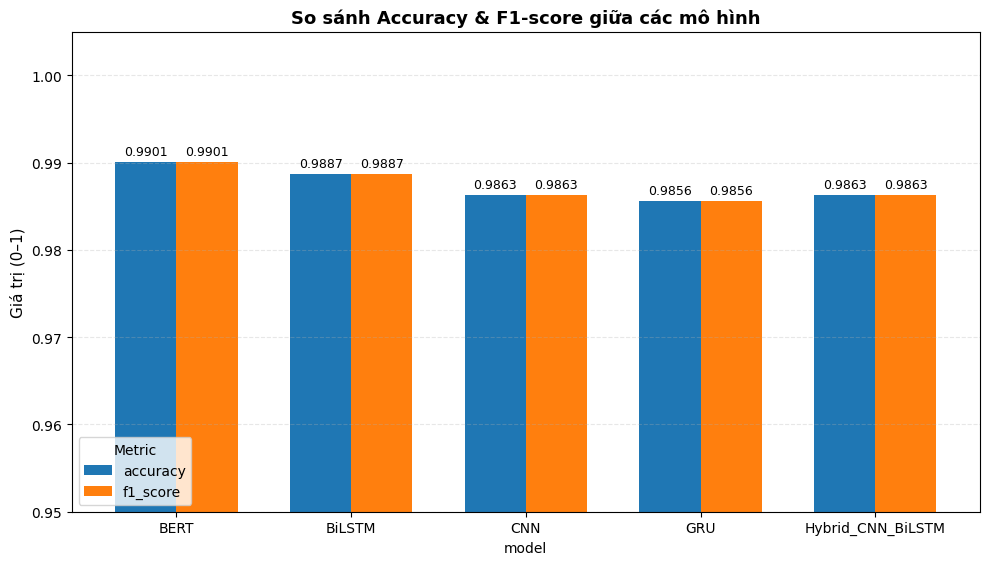

In [4]:
# Vẽ biểu đồ cột so sánh Accuracy và F1-score
ax = df_metrics[["accuracy", "f1_score"]].plot(
    kind="bar",
    figsize=(10, 6),
    color=["#1f77b4", "#ff7f0e"],  # Xanh dương & cam dễ phân biệt
    width=0.7,
)

plt.title("So sánh Accuracy & F1-score giữa các mô hình", fontsize=13, fontweight="bold")
plt.ylabel("Giá trị (0–1)", fontsize=11)
plt.ylim(0.95, 1.005)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3, linestyle="--")

# Thêm nhãn giá trị trên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt="%.4f", padding=3, fontsize=9)

plt.legend(title="Metric", loc="lower left")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4. So sánh AUC (Area Under ROC Curve)


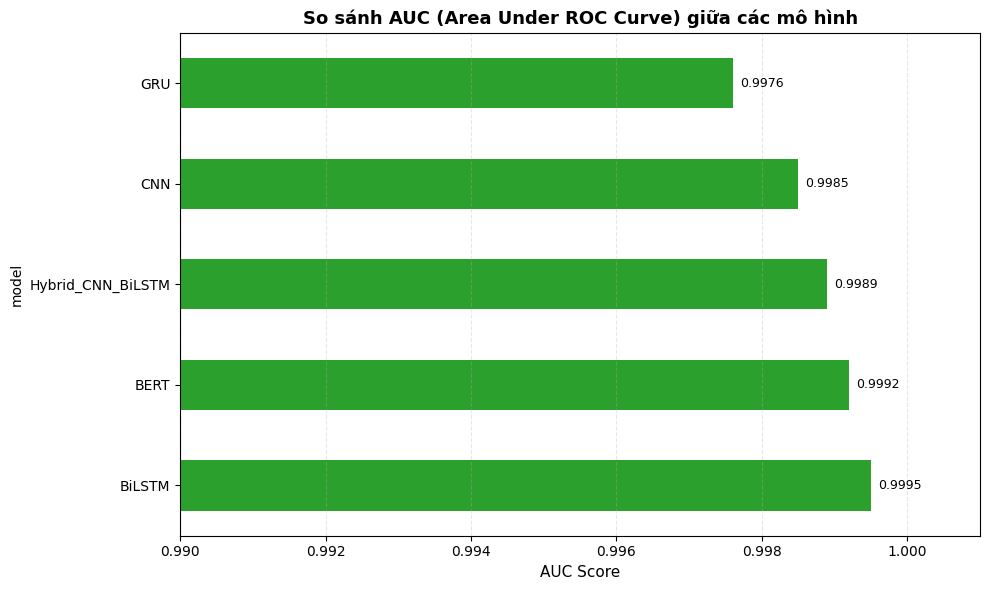

Bảng so sánh AUC:
                      auc
model                    
BiLSTM             0.9995
BERT               0.9992
Hybrid_CNN_BiLSTM  0.9989
CNN                0.9985
GRU                0.9976


In [5]:
# So sánh AUC
if "auc" in df_metrics.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_metrics["auc"].sort_values(ascending=False).plot(
        kind="barh",
        color="#2ca02c",
        ax=ax
    )
    plt.title("So sánh AUC (Area Under ROC Curve) giữa các mô hình", fontsize=13, fontweight="bold")
    plt.xlabel("AUC Score", fontsize=11)
    plt.xlim(0.99, 1.001)
    plt.grid(axis="x", alpha=0.3, linestyle="--")
    
    # Thêm nhãn giá trị
    for i, v in enumerate(df_metrics["auc"].sort_values(ascending=False)):
        ax.text(v + 0.0001, i, f"{v:.4f}", va="center", fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # In bảng AUC
    print("Bảng so sánh AUC:")
    print(df_metrics[["auc"]].sort_values(by="auc", ascending=False).round(4))


## 5. So sánh các Error Rates (FDR, FNR, FOR, FPR)


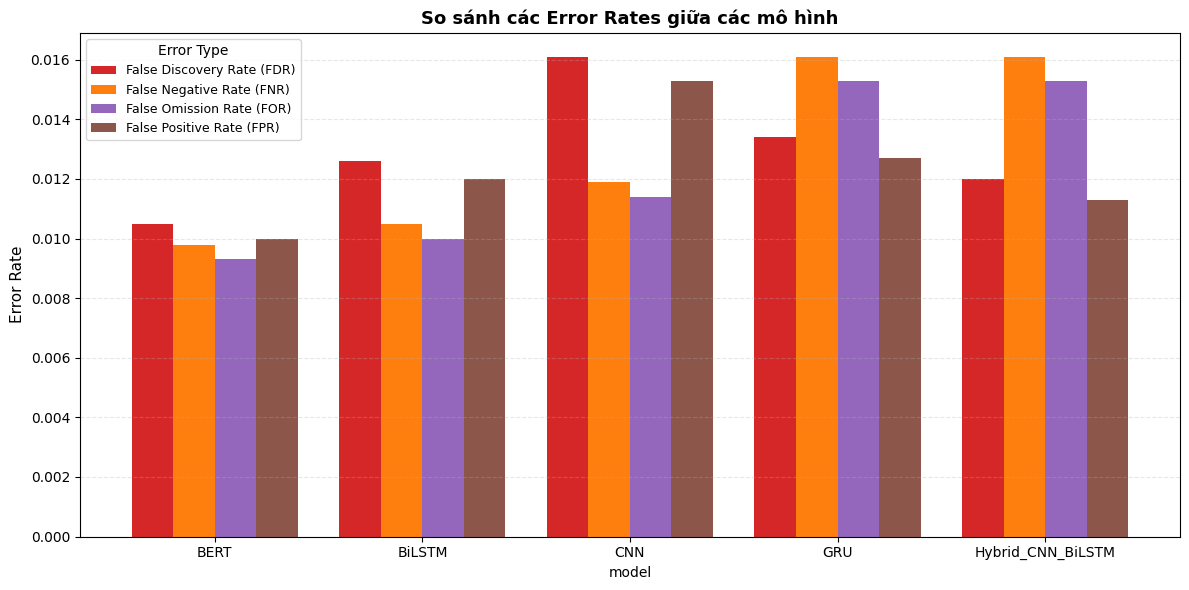

Bảng so sánh Error Rates:
                   False Discovery Rate (FDR)  False Negative Rate (FNR)  \
model                                                                      
BERT                                   0.0105                     0.0098   
BiLSTM                                 0.0126                     0.0105   
CNN                                    0.0161                     0.0119   
GRU                                    0.0134                     0.0161   
Hybrid_CNN_BiLSTM                      0.0120                     0.0161   

                   False Omission Rate (FOR)  False Positive Rate (FPR)  
model                                                                    
BERT                                  0.0093                     0.0100  
BiLSTM                                0.0100                     0.0120  
CNN                                   0.0114                     0.0153  
GRU                                   0.0153                     0.0127

In [6]:
# Lấy các error rate metrics
error_rate_cols = [
    "False Discovery Rate (FDR)",
    "False Negative Rate (FNR)",
    "False Omission Rate (FOR)",
    "False Positive Rate (FPR)"
]

# Lọc các cột có trong dataframe
available_error_cols = [col for col in error_rate_cols if col in df_metrics.columns]

if available_error_cols:
    # Vẽ biểu đồ so sánh error rates
    fig, ax = plt.subplots(figsize=(12, 6))
    df_metrics[available_error_cols].plot(
        kind="bar",
        ax=ax,
        width=0.8,
        color=["#d62728", "#ff7f0e", "#9467bd", "#8c564b"]
    )
    plt.title("So sánh các Error Rates giữa các mô hình", fontsize=13, fontweight="bold")
    plt.ylabel("Error Rate", fontsize=11)
    plt.xticks(rotation=0)
    plt.legend(title="Error Type", loc="upper left", fontsize=9)
    plt.grid(axis="y", alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()
    
    # In bảng error rates
    print("Bảng so sánh Error Rates:")
    print(df_metrics[available_error_cols].round(4))


## 6. So sánh NPV (Negative Predictive Value)


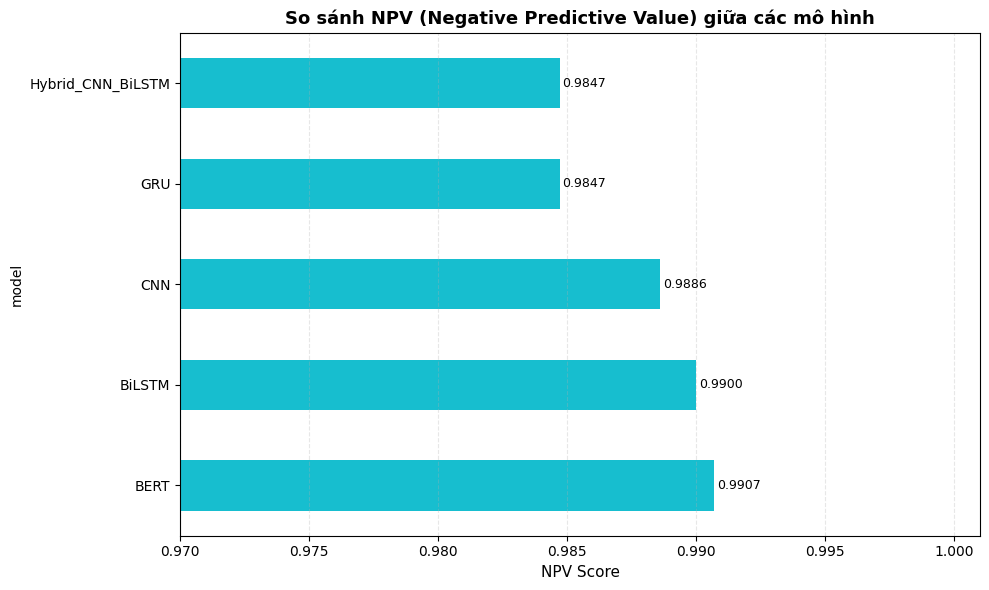

Bảng so sánh NPV:
                   Negative Prediction Value (NPV)
model                                             
BERT                                        0.9907
BiLSTM                                      0.9900
CNN                                         0.9886
GRU                                         0.9847
Hybrid_CNN_BiLSTM                           0.9847


In [7]:
# So sánh NPV
if "Negative Prediction Value (NPV)" in df_metrics.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_metrics["Negative Prediction Value (NPV)"].sort_values(ascending=False).plot(
        kind="barh",
        color="#17becf",
        ax=ax
    )
    plt.title("So sánh NPV (Negative Predictive Value) giữa các mô hình", fontsize=13, fontweight="bold")
    plt.xlabel("NPV Score", fontsize=11)
    plt.xlim(0.97, 1.001)
    plt.grid(axis="x", alpha=0.3, linestyle="--")
    
    # Thêm nhãn giá trị
    for i, v in enumerate(df_metrics["Negative Prediction Value (NPV)"].sort_values(ascending=False)):
        ax.text(v + 0.0001, i, f"{v:.4f}", va="center", fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # In bảng NPV
    print("Bảng so sánh NPV:")
    print(df_metrics[["Negative Prediction Value (NPV)"]].sort_values(by="Negative Prediction Value (NPV)", ascending=False).round(4))


## 7. So sánh Train, Validation và Test Metrics


Bảng so sánh Train, Validation và Test:
                   Train Accuracy  Validation Accuracy  Test Accuracy  \
Model                                                                   
BERT                       0.9992               0.9935         0.9901   
BiLSTM                     0.9988               0.9880         0.9887   
CNN                        0.9968               0.9887         0.9863   
GRU                        0.9979               0.9832         0.9856   
Hybrid_CNN_BiLSTM          0.9938               0.9860         0.9863   

                   Train F1  Validation F1  Test F1  Train AUC  \
Model                                                            
BERT                 0.9992         0.9935   0.9901     1.0000   
BiLSTM               0.9988         0.9880   0.9887     1.0000   
CNN                  0.9968         0.9887   0.9863     1.0000   
GRU                  0.9979         0.9832   0.9856     1.0000   
Hybrid_CNN_BiLSTM    0.9938         0.9860   0.9863 

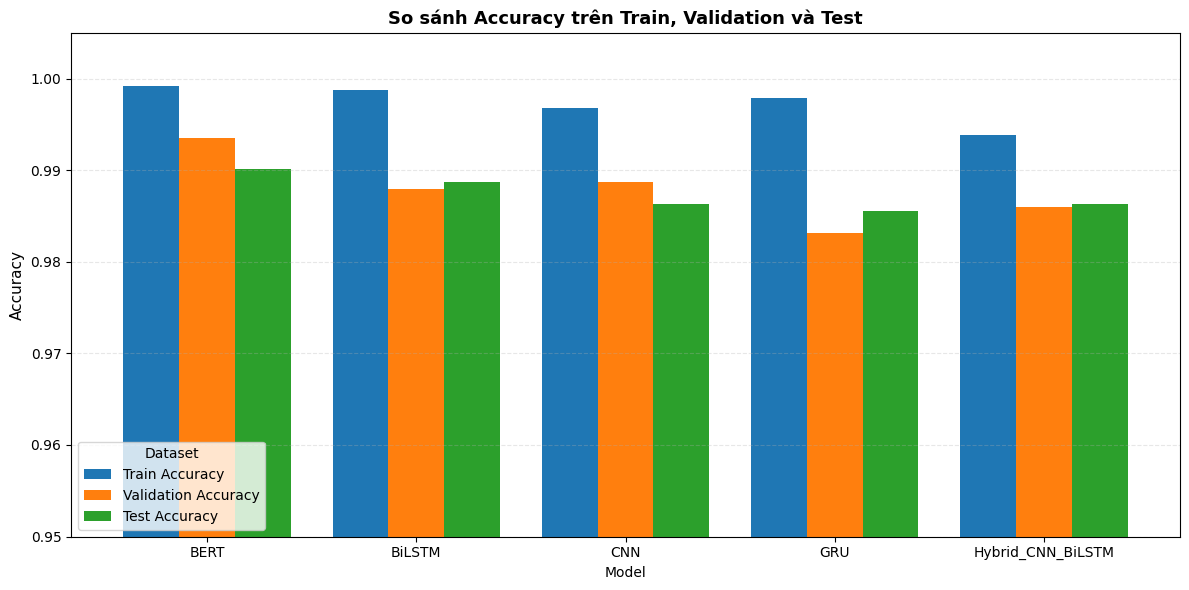

In [8]:
# Tạo bảng so sánh train, validation và test cho từng model
comparison_data = []

for model_name, data in all_metrics_data.items():
    row = {"Model": model_name}
    
    # Lấy accuracy từ train, validation, test
    if "train_evaluation" in data and "accuracy" in data["train_evaluation"]:
        row["Train Accuracy"] = data["train_evaluation"]["accuracy"]
    if "validation_evaluation" in data and "accuracy" in data["validation_evaluation"]:
        row["Validation Accuracy"] = data["validation_evaluation"]["accuracy"]
    if "test_evaluation" in data and "accuracy" in data["test_evaluation"]:
        row["Test Accuracy"] = data["test_evaluation"]["accuracy"]
    
    # Lấy F1-score từ train, validation, test
    if "train_evaluation" in data and "f1_score" in data["train_evaluation"]:
        row["Train F1"] = data["train_evaluation"]["f1_score"]
    if "validation_evaluation" in data and "f1_score" in data["validation_evaluation"]:
        row["Validation F1"] = data["validation_evaluation"]["f1_score"]
    if "test_evaluation" in data and "f1_score" in data["test_evaluation"]:
        row["Test F1"] = data["test_evaluation"]["f1_score"]
    
    # Lấy AUC từ train, validation, test
    if "train_evaluation" in data and "auc" in data["train_evaluation"]:
        row["Train AUC"] = data["train_evaluation"]["auc"]
    if "validation_evaluation" in data and "auc" in data["validation_evaluation"]:
        row["Validation AUC"] = data["validation_evaluation"]["auc"]
    if "test_evaluation" in data and "auc" in data["test_evaluation"]:
        row["Test AUC"] = data["test_evaluation"]["auc"]
    
    comparison_data.append(row)

df_comparison = pd.DataFrame(comparison_data).set_index("Model")
print("Bảng so sánh Train, Validation và Test:")
print(df_comparison.round(4))

# Vẽ biểu đồ so sánh accuracy trên 3 tập dữ liệu
if "Train Accuracy" in df_comparison.columns and "Validation Accuracy" in df_comparison.columns and "Test Accuracy" in df_comparison.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    df_comparison[["Train Accuracy", "Validation Accuracy", "Test Accuracy"]].plot(
        kind="bar",
        ax=ax,
        width=0.8,
        color=["#1f77b4", "#ff7f0e", "#2ca02c"]
    )
    plt.title("So sánh Accuracy trên Train, Validation và Test", fontsize=13, fontweight="bold")
    plt.ylabel("Accuracy", fontsize=11)
    plt.xticks(rotation=0)
    plt.legend(title="Dataset", loc="lower left")
    plt.grid(axis="y", alpha=0.3, linestyle="--")
    plt.ylim(0.95, 1.005)
    plt.tight_layout()
    plt.show()


## 8. Bảng tổng hợp tất cả metrics


In [9]:
# In bảng tổng hợp tất cả metrics có sẵn
print("="*80)
print("BẢNG TỔNG HỢP TẤT CẢ METRICS (Test Set)")
print("="*80)
print(df_metrics.sort_values(by="accuracy", ascending=False).round(4))
print("\n" + "="*80)


BẢNG TỔNG HỢP TẤT CẢ METRICS (Test Set)
                   accuracy  f1_score  precision  recall     auc  \
model                                                              
BERT                 0.9901    0.9901     0.9901  0.9901  0.9992   
BiLSTM               0.9887    0.9887     0.9887  0.9887  0.9995   
CNN                  0.9863    0.9863     0.9863  0.9863  0.9985   
Hybrid_CNN_BiLSTM    0.9863    0.9863     0.9863  0.9863  0.9989   
GRU                  0.9856    0.9856     0.9856  0.9856  0.9976   

                   False Discovery Rate (FDR)  False Negative Rate (FNR)  \
model                                                                      
BERT                                   0.0105                     0.0098   
BiLSTM                                 0.0126                     0.0105   
CNN                                    0.0161                     0.0119   
Hybrid_CNN_BiLSTM                      0.0120                     0.0161   
GRU                        

## 9. Thông tin cấu hình model


In [10]:
# In thông tin cấu hình của từng model
print("="*80)
print("THÔNG TIN CẤU HÌNH CÁC MODEL")
print("="*80)

for model_name, data in all_metrics_data.items():
    if "model_config" in data:
        print(f"\n{model_name}:")
        config = data["model_config"]
        for key, value in config.items():
            print(f"  {key}: {value}")
        print("-" * 80)


THÔNG TIN CẤU HÌNH CÁC MODEL

BERT:
  model: BERT-base (HuggingFace, PyTorch)
  pretrained_name: bert-base-uncased
  max_len: 512
  num_labels: 2
  epochs_trained: 6
  train_batch_size: 8
  eval_batch_size: 8
  learning_rate: 2e-05
--------------------------------------------------------------------------------

BiLSTM:
  model: BiLSTM
  embedding_dim: 256
  vocab_size: 20000
  max_len: 512
  epochs_trained: 8
  actual_vocab_size: 20000
--------------------------------------------------------------------------------

CNN:
  model: CNN
  embedding_dim: 256
  vocab_size: 20000
  max_len: 512
  epochs_trained: 11
  actual_vocab_size: 20000
--------------------------------------------------------------------------------

GRU:
  model: GRU
  embedding_dim: 256
  vocab_size: 20000
  max_len: 512
  epochs_trained: 10
  actual_vocab_size: 20000
--------------------------------------------------------------------------------

Hybrid_CNN_BiLSTM:
  model: Hybrid_CNN_BiLSTM
  embedding_dim: 256
  